In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Audio Machine Learning - Summative Assessment 1 - Machine Learning Challenge - Part 1

For the first part of the machine learning challenge, your task is to implement and train a binary classifier neural network using PyTorch.

There are sections in the Notebook which are left for you to complete, which will be assessed to determine your overall grade for this assessment. These will be marked as below:

## __Assessed Section__
----------

In [2]:
# Any code cells in the 'Assessed Section' will be graded as part of the assessment. 
# There will be instructions for you to follow within these parts of the notebook.
# Your submission will be the Notebook file, with the Assessed Sections filled in
# This one doesn't count, as it is just a demonstration!

----------
## __End of Assessed Section__

***
***
## __Task 1__ - Dataset Loading and Visualisation

The dataset is currently stored in two numpy files included with this Notebook, 'class_0.npy' and 'class_1.npy'. If you are using Notebable, you will need to upload these files to Noteable.

Each numpy file contains a dataset of examples of a class, either 'class 0' or 'class 1'. The data is held in a numpy array of the following shape:

$(N, j)$

Where the $N$ denotes how many data points are held in the dataset, and $j$ denotes how many features describe each data point.

----
Before training a machine learning model, it is important to split your dataset into three subsets: a _training_ set, a _validation_ set, and a _test_ set.

The _training_ subset should contain 60% of the datapoints, the _validation_ subset should contain 20% of the datapoints, and the _test_ subset should contain the remaining 20% of the datapoints.

Each subset should consist of a torch tensor holding the features, and a torch tensor holding the corresponding labels. For example, if the first datapoint of the subset contains an example of class 0, then 'subset_features[0, :]' should return the features of the first datapoint in the subset, and subset_labels[0,:] should return the label of the first datapoint in the subset, in this case '0'.

Each feature tensor should be a torch tensor of shape $(N, j)$, where $N$ is however many datapoints are in this subset. Each label tensor should be a torch tensor of shape $(N, 1)$.

- Ensure that there is no overlap between the subsets. Each datapoint should appear exactly once in one of the three subsets. For example, a datapoint in the training subset should not appear in either the validation or test subsets.
- Ensure that each subset contains the same number of examples from both classes. Each subset should consist of exactly 50% datapoints of class 'class_0' and exactly 50% datapoints of class 'class_1'
- Use the torch.from_numpy() function to convert numpy arrays into Torch tensors

## __Assessed Section - 1.1__
----------

Your task is to:
- Load the data held in the files 'class_0.npy' and 'class_1.npy'.
- Create a scatter plot using MatPlotLib (imported in this NoteBook as 'plt'). Each datapoint should appear on the scatter plot, with the x-axis indicating the value of the first feature, and the y-axis indicating the value of the second feature. The two classes should be labelled using the plt.legend() method.
- Split the dataset into the three subsets described in the previous cell.

In [4]:
# Your Solution Here

# Load data as arrays
class_0 = np.load('class_0.npy')
class_1 = np.load('class_1.npy')

# Check size of each dataset
size_0 = np.size(class_0, axis=0)
size_1 = np.size(class_1, axis=0)

# Create labels
class_0_labels = np.zeros((size_0,1))
class_1_labels = np.ones((size_1,1))



Text(0, 0.5, 'Feature 2')

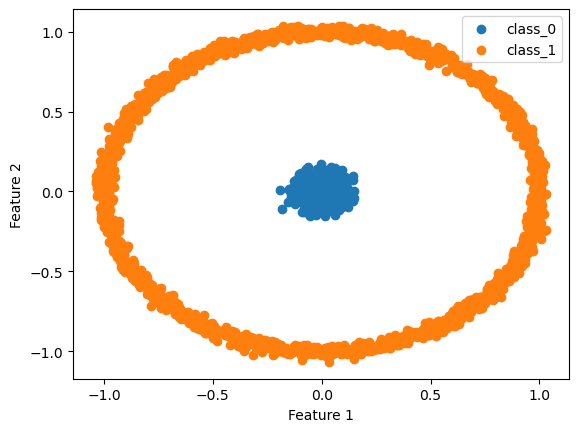

In [6]:

# Create features for plotting
x0 = class_0[:,0]
y0 = class_0[:,1]

y1 = class_1[:,1]
x1 = class_1[:,0]

# Plot the features
plt.scatter(x0,y0, label='class_0') 
plt.scatter(x1,y1, label='class_1')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [ ]:
# Concatenate the data into features and labels

full_features = np.concatenate((class_0, class_1), axis = 0)
full_labels = np.concatenate((class_0_labels, class_1_labels), axis = 0)

In [10]:
# Split the data into test, train, val

train_x, temp_x, train_y, temp_y = train_test_split(
    full_features, full_labels, test_size=0.30, random_state=0, stratify = full_labels)

val_x, test_x, val_y, test_y = train_test_split(
    temp_x, temp_y, test_size=0.50, random_state=0, stratify = temp_y)

del temp_x, temp_y

In [16]:
# Check the proportion of values within the datasets. It should be 50%, 50% split

values_train, counts_train = np.unique(train_y, return_counts=True)
values_val, counts_val = np.unique(val_y, return_counts=True)
values_test, counts_test = np.unique(test_y, return_counts=True)

assert counts_train[0] == counts_train[1] , "Train labels not equal split"
assert counts_val[0] == counts_val[1] , "Val labels not equal split"
assert counts_test[0] == counts_test[1] , "Train labels not equal split"

In [23]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [ ]:
# Create a dataset class for the binary dataset

class BinaryDataset(Dataset):
    def __init__(self, _features, _labels):
        self.features = _features
        self.labels = _labels

    def __len__(self):
        return np.size(self.labels, axis=0)
    
    def __getitem__(self, index):
        feature = self.features[index,:]
        label = self.labels[index,:]
    
        return feature, label



In [27]:
train_ds = BinaryDataset(train_x, train_y)
test_ds  = BinaryDataset(test_x, test_y)
val_ds   = BinaryDataset(val_x,  val_y)

In [28]:
batch_size = 32

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False) # No need to shuffle validation/test sets
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False) # No need to shuffle validation/test sets


----------
## __End of Assessed Section - 1.1__

***
***
# __Task 2__ - Neural Network Initialisation

We want to make a classifier, that attempts to predict the class of a datapoint, from the datapoint's features.

We will do this using a neural network.
It should take the input features of any number of datapoints as input, and process them to produce a prediction of the class corresponding to the input features of each datatpoint.

The neural network should consist of:
- A Linear Layer
- A non-linear activation function layer
- A second Linear Layer.
- A final non-linear activation function layer

The neural network should have a 'forward' method that processes input through the layers, in the order they are listed above.

The final non-linear activation function layer should force the outputs to be in range [0, 1]. (We learned about an appropriate function for doing this in Lecture 3, on logistic regression!)

Define the layers of the neural network in the 'constructor function' of the neural network class. Each layer should be a PyTorch layer from the 'torch.nn' library.

## __Assessed Section - 1.2__
----

Your task is to complete the Neural Network class template, 'NNet' below:
- Define the layers of the Neural Network in the class constructor, as described in the previous cell.
- Define the forward function of the Neural Network, as described in the previous cell.
- Create an instance of your Neural Network, and process some data with it.

In [70]:
class NNet(nn.Module):               # Don't change this line
    def __init__(self):              # Don't change this line
        super(NNet, self).__init__() # Don't change this line

        input_dim = 2
        hidden_dim = 64

        self.input = nn.Linear( in_features = input_dim , out_features = hidden_dim)
        self.act1 = nn.Sigmoid()

        self.hidden_1 = nn.Linear( in_features = hidden_dim, out_features = hidden_dim)
        self.act2 = nn.Sigmoid()

        self.output = nn.Linear( in_features = hidden_dim , out_features = 1 )
        # This is the constructor function
        # define your neural network layers here
        # Don't forget to save them as class attributes using 'self.'
        
    def forward(self, x):            # Don't change this line

        z1 = self.input(x) # z1: [batch_size, hidden_size]
        a1 = self.act1(z1) # a1: [batch_size, hidden_size]
        z2 = self.hidden_1(a1) # z2: [batch_size, hidden_size]
        a2 = self.act2(z2)   # a2: [batch_size, hidden_size]
        z3 = self.output(a2) # z3: [batch_size, 1]
        return z3 #   z3.squeeze(1) # Return logits (no sigmoid applied)

        # This is the forward pass of the neural network
        # It should receive an input tensor, x, which contains N datapoints, with each datapoint being described by j features
        # The shape of the input tensor x should be 'x.shape = (N, j)'
        # The forward pass should use the layers defined in the constructor function of the neural network, to process the input features into
        # predictions of the class.
        # Finally, it should return the predicted class labels using the return statement below.
        #return # Return the neural network's predicted labels here

In [71]:
# Create model

model = NNet()
print(model)

# Quick forward pass sanity check

X_batch, y_batch = next(iter(train_loader))
y_hat =  model.forward(X_batch) # This is also called a logit. A logit is the raw output from the final layer
print("y_hat shape:", y_hat.shape)  # should be [batch_size, 1]

NNet(
  (input): Linear(in_features=2, out_features=64, bias=True)
  (act1): Sigmoid()
  (hidden_1): Linear(in_features=64, out_features=64, bias=True)
  (act2): Sigmoid()
  (output): Linear(in_features=64, out_features=1, bias=True)
)
y_hat shape: torch.Size([32, 1])


In [73]:
# You may add as many cells as you like for your solution. Just ensure they appear before the 'End of Assessed Section' cell.

----------
## __End of Assessed Section - 1.2__

***
***
# __Task 3__ - Binary Cross Entropy Loss

The binary cross entropy loss function measures the difference between neural network predictions, and the true class labels.

It is given by the following formula:

$$L(y^{(i)},\hat{y}^{(i)})=-(y^{(i)}\log(\hat{y}^{(i)}) + (1 - y^{(i)})\log(1 - \hat{y}^{(i)}))$$

Where log is the natural logarithm function, $y^{(i)}$ is the target label for the $i-th$ datapoint, and $\hat{y}^{(i)}$ is the model's predicted label for $i-th$ datapoint.

This calculates the loss for a single datapoint, $i$. To find the loss for a batch of datapoints, calculate the loss for each individual datapoint, and take the mean of the loss over the batch.

## __Assessed Section - 1.3__
----

Your task is to implement the Binary Cross-Entropy loss function in the template below:
- The loss function should take two PyTorch tensors as inputs, a batch of $N$ model predictions, y_hat, and the corresponding $N$ target labels, y.
- Both input tensors should be of shape $(N, 1)$.
- As the input to the natural log function tends to 0, the output approaches  negative infinity. In your BCE loss function implementation you can avoid negative infinity terms by applying the torch.clamp() function to inputs to the log function.
- You may __only__ use the torch.log(), torch.clamp(), and torch.mean() functions from the torch library for your implementation.
- The loss function should return a tensor, that is a scalar, that corresponds to the mean BCE loss over the batch that was input to the function.

In [74]:
class BCELoss(nn.Module):              # Don't change this line
    def __init__(self):                # Don't change this line
        super(BCELoss, self).__init__()# Don't change this line
        

    def forward(self, y, y_hat): # Don't change this line
        eps = 1e-10 # define the epsilon, the minimum value allowed
        loss = torch.mean( -(y*torch.log( torch.clamp(y_hat, min = eps , max= 1)) +(1-y)*torch.log( torch.clamp( 1-y_hat, min = eps, max= 1) )  ) )
        return  loss # Return the binary cross entropy loss here

In [75]:
loss_fn = BCELoss()
loss = loss_fn.forward(y_batch, y_hat)

print(f'Loss before step is {loss.item()}')

Loss before step is 13.671598613262177


Apply a single step of training, our loss should decrease

In [76]:
learning_rate = 0.0001
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

#  Do the backward pass on the calculated loss
loss.backward()

#  Take a step with the optimiser
optimiser.step()                      

#  Zero the optimiser gradients (in preparation for the next parameter update)
optimiser.zero_grad()

y_hat_new = model(X_batch) 
loss = loss_fn(y_hat_new, y_batch)
print(f'Loss after step is {loss.item()}')

Loss after step is 13.895660340400166


In [77]:
y_hat_new = model(X_batch) 
loss = loss_fn(y_hat_new, y_batch)
print(f'Loss after step is {loss.item()}')

Loss after step is 13.895660340400166


----------
## __End of Assessed Section - 1.3__

***
***
# __Task 4__ - Neural Network Training

Implement a neural network training loop that carries out batch gradient descent on your training dataset. 

Create an instance of the PyTorch torch.optim.SGD() optimiser to update your model parameters.

For each training iteration:
- Zero the gradients in the optimiser
- Pass the features of the full training dataset to the neural network to get the model's predictions
- Calculate the loss (you may use the PyTorch BCE Loss function if you're uncertain about your implementation - you will not lose any marks for doing this)
- Call the backward method on the loss
- Update the neural network model's parameters using the optimiser.step() method
- Append the training loss to a list of training losses

After every 20th training iteration, find the validation loss and accuracy:
- Pass the features of the full validation dataset to the neural network to get the model's predictions
- Calculate the loss
- Find the model's classification accuracy on the validation set (assume a decision boundary at y_hat=0.5)
- Append the validation loss to a list of validation losses, and append the validation accuracy to a list of validation accuracies.

## __Assessed Section - 1.4__
----

Impletment the neural network training and validation as descibed above:
- Run the training for 1000 iterations, whilst monitoring the validation loss and accuracy
- Plot the training and validation losses against the training iteration number
- Plot the validation accuracy against the training iteration number
- Calculate the model's loss and accuracy on the test subset

In [78]:
# Put your neural network training code here
# You will not assessed on the accuracy or loss achieved by your model, but instead on whether you implemented the steps described in the previous cell correctly.


# Code for one epoch
def train_one_epoch(dataloader, model, loss_fn, optimiser):
    running_loss = 0.0
    correct = 0
    total = 0

    # For-loop that iterates over each batch in the dataloader
    for X, y in dataloader:

        # Zero grad
        optimiser.zero_grad()

        # Forward Pass
        y_hat = model(X)                       # y_hat.shape = [B,]

        # Calculate Loss
        loss = loss_fn(y_hat, y)

        # Backward Pass
        loss.backward()

        # Update Parameters
        optimiser.step()

        # Log training stats
        running_loss += loss.item()
        probs = torch.sigmoid(y_hat)      # convert raw predictions -> probability
        predicted_class = (probs>=0.5).float()
        correct += (predicted_class == y).sum()
        total += X.size(0)

    # Divide running loss by number of batches
    avg_loss = running_loss / len(dataloader)
    # Find accuracy over full dataset
    acc = correct / total
    return avg_loss, acc



In [79]:
# Evaluate the model

def evaluate(dataloader, model, loss_fn):
    running_loss = 0.0
    correct = 0
    total = 0

    for X, y in dataloader:
        y_hat = model(X)
        loss = loss_fn(y_hat, y)

        # Log evaluation stats
        running_loss += loss.item()
        probs = torch.sigmoid(y_hat)      # convert raw predictions -> probability
        predicted_class = (probs>=0.5).float()
        correct += (predicted_class == y).sum()
        total += X.size(0)

    # Divide running loss by number of batches
    avg_loss = running_loss / len(dataloader)
    # Find accuracy over full dataset
    acc = correct / total
    return avg_loss, acc

Reinitialise the neural network, optimiser and loss function

In [87]:
# Create a model object
model=NNet()

# Define learning rate, create optimiser
learning_rate = 0.05
optimiser = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Define loss function
loss_fn = nn.BCEWithLogitsLoss()

In [88]:
# Define number of training epochs
epochs = 1000

# Lists for monitoring training
train_loss_list, train_acc_list = [], []
val_loss_list, val_acc_list = [], []

# Loop for neural network training
for epoch in range(1, epochs + 1):
    train_loss, train_acc = train_one_epoch(train_loader, model, loss_fn, optimiser)

    # This disables gradient tracking in torch for the indented code
    # It isn't strictly neccessary but saves computational cost
    with torch.inference_mode():
        val_loss, val_acc = evaluate(val_loader, model, loss_fn)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

    if epoch % 20 == 0:
        print(
            f"Epoch {epoch:02d} | "
            f"train loss {train_loss:.4f}, train acc {train_acc:.3f} | "
            f"val loss {val_loss:.4f}, val acc {val_acc:.3f}"
        )

Epoch 20 | train loss 0.6950, train acc 0.492 | val loss 0.6942, val acc 0.500
Epoch 40 | train loss 0.6941, train acc 0.503 | val loss 0.6939, val acc 0.500
Epoch 60 | train loss 0.6943, train acc 0.485 | val loss 0.6931, val acc 0.500
Epoch 80 | train loss 0.6934, train acc 0.511 | val loss 0.6923, val acc 0.500
Epoch 100 | train loss 0.6926, train acc 0.521 | val loss 0.6912, val acc 0.500
Epoch 120 | train loss 0.6910, train acc 0.534 | val loss 0.6887, val acc 0.313
Epoch 140 | train loss 0.6856, train acc 0.553 | val loss 0.6839, val acc 0.768
Epoch 160 | train loss 0.6689, train acc 0.610 | val loss 0.6667, val acc 0.630
Epoch 180 | train loss 0.5344, train acc 0.925 | val loss 0.5364, val acc 0.780
Epoch 200 | train loss 0.0922, train acc 1.000 | val loss 0.0879, val acc 1.000
Epoch 220 | train loss 0.0226, train acc 1.000 | val loss 0.0217, val acc 1.000
Epoch 240 | train loss 0.0109, train acc 1.000 | val loss 0.0105, val acc 1.000
Epoch 260 | train loss 0.0067, train acc 1.0

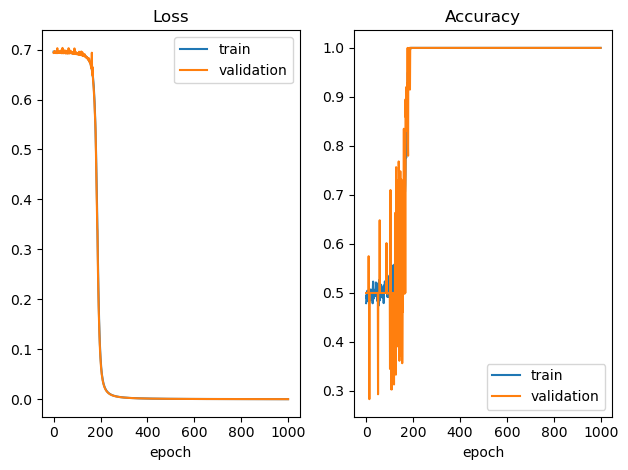

In [89]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
plt.plot(train_loss_list, label="train")
plt.plot(val_loss_list, label="validation")
plt.title("Loss")
plt.xlabel("epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_acc_list, label="train")
plt.plot(val_acc_list, label="validation")
plt.title("Accuracy")
plt.xlabel("epoch")
plt.legend()
plt.tight_layout()
plt.show()

----------
## __End of Assessed Section - 1.4__

***
***
# __Further Work__

The above is sufficient to achieve a mark of 60 for Postgraduate students and 67 for Undergraduate Students. if you wish to go further to get a higher grade, you can try and implement some of the following:

- Implement Stochastic Gradient Descent in the training loop, so instead of processing the whole dataset in each training iteration, you process a random batch instead
- Make a plot of the decision boundary of the neural network before and after training.
- Implement the training using a Mean-Squared-Error loss function instead. Train one model with the MSE loss, and one with the BCE loss, and compare the accuracy on the validation and test sets over the duration of the training.

In [ ]:
# Further work here